# NCA5 Hydrogen Senky Diagram
Looking at data from Princeton Net-Zero America: https://netzeroamerica.princeton.edu/

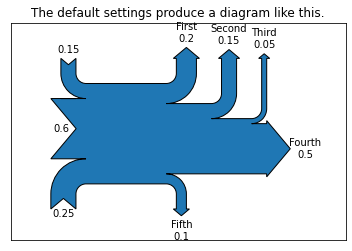

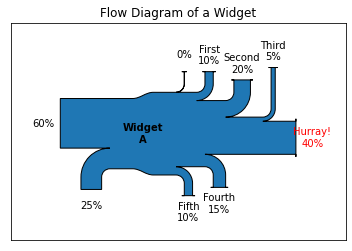

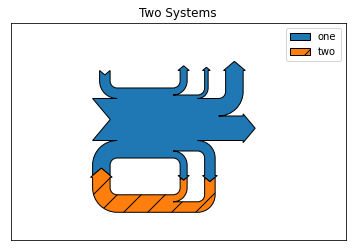

In [1]:
"""
================
The Sankey class
================

Demonstrate the Sankey class by producing three basic diagrams.
"""

import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey


###############################################################################
# Example 1 -- Mostly defaults
#
# This demonstrates how to create a simple diagram by implicitly calling the
# Sankey.add() method and by appending finish() to the call to the class.

Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")

###############################################################################
# Notice:
#
# 1. Axes weren't provided when Sankey() was instantiated, so they were
#    created automatically.
# 2. The scale argument wasn't necessary since the data was already
#    normalized.
# 3. By default, the lengths of the paths are justified

###############################################################################
# Example 2
#
# This demonstrates:
#
# 1. Setting one path longer than the others
# 2. Placing a label in the middle of the diagram
# 3. Using the scale argument to normalize the flows
# 4. Implicitly passing keyword arguments to PathPatch()
# 5. Changing the angle of the arrow heads
# 6. Changing the offset between the tips of the paths and their labels
# 7. Formatting the numbers in the path labels and the associated unit
# 8. Changing the appearance of the patch and the labels after the figure is
#    created

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a Widget")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[25, 0, 60, -10, -20, -5, -15, -10, -40],
           labels=['', '', '', 'First', 'Second', 'Third', 'Fourth',
                   'Fifth', 'Hurray!'],
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA")  # Arguments to matplotlib.patches.PathPatch
diagrams = sankey.finish()
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')

###############################################################################
# Notice:
#
# 1. Since the sum of the flows is nonzero, the width of the trunk isn't
#    uniform.  The matplotlib logging system logs this at the DEBUG level.
# 2. The second flow doesn't appear because its value is zero.  Again, this is
#    logged at the DEBUG level.


###############################################################################
# Example 3
#
# This demonstrates:
#
# 1. Connecting two systems
# 2. Turning off the labels of the quantities
# 3. Adding a legend

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], label='two',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend()

###############################################################################
# Notice that only one connection is specified, but the systems form a
# circuit since: (1) the lengths of the paths are justified and (2) the
# orientation and ordering of the flows is mirrored.

plt.show()


#############################################################################
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.sankey`
#    - `matplotlib.sankey.Sankey`
#    - `matplotlib.sankey.Sankey.add`
#    - `matplotlib.sankey.Sankey.finish`
